In [18]:
import pandas as pd
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imutils import paths

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Model
from keras.optimizers import Adam



from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [19]:
path = "data500"

Image_paths = list(paths.list_images(path))
print(len(Image_paths))
print(os.listdir(path))

888
['bad', 'good']


In [20]:
images = []
labels = []

for image_path in Image_paths:
    label  = image_path.split(os.path.sep)[-2]
    image  = cv2.imread(image_path)
    image  = cv2.resize(image, (400, 400))
    
    images.append(image)
    labels.append(label)

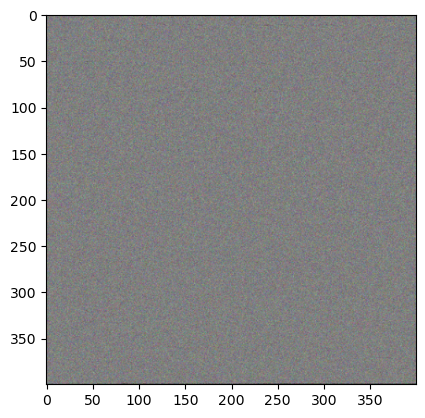

In [21]:
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [22]:
images = np.array(images) / 255.0
labels = np.array(labels)

In [23]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [24]:
(train_X, test_X, train_y, test_y) = train_test_split(images,labels,test_size=0.10, random_state=42)

In [25]:
train_generator =  ImageDataGenerator(fill_mode='nearest', rotation_range=15)

In [ ]:
input_shape = (400, 400, 3)
input_tensor = Input(shape=input_shape)

# Convolutional layers with max pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer to transition from convolution to fully connected layers
x = Flatten()(x)

# Fully connected layer with dropout
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer with softmax activation for classification
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 output classes

# Create the model
model = Model(inputs=input_tensor, outputs=predictions)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [42]:
model =  Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3),
              metrics= ['accuracy'], loss= 'binary_crossentropy')

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 100, 128)     0   

In [55]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 20

In [56]:
history =  model.fit(train_generator.flow(train_X,
                                                   train_y,
                                                   batch_size= batch_size),
                             steps_per_epoch= train_steps,
                             validation_data = (test_X, test_y),
                             epochs= epochs)

Epoch 1/20
99/99 [==============================] - 14s 138ms/step - loss: 0.0394 - accuracy: 0.9836 - val_loss: 0.2038 - val_accuracy: 0.9438
Epoch 2/20
99/99 [==============================] - 13s 135ms/step - loss: 0.0677 - accuracy: 0.9684 - val_loss: 0.1869 - val_accuracy: 0.9438
Epoch 3/20
99/99 [==============================] - 13s 133ms/step - loss: 0.0594 - accuracy: 0.9722 - val_loss: 0.1820 - val_accuracy: 0.9213
Epoch 4/20
99/99 [==============================] - 13s 135ms/step - loss: 0.0694 - accuracy: 0.9747 - val_loss: 0.1766 - val_accuracy: 0.9438
Epoch 5/20
99/99 [==============================] - 13s 134ms/step - loss: 0.0571 - accuracy: 0.9735 - val_loss: 0.2220 - val_accuracy: 0.9326
Epoch 6/20
99/99 [==============================] - 13s 133ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.1704 - val_accuracy: 0.9326
Epoch 7/20
99/99 [==============================] - 14s 141ms/step - loss: 0.0691 - accuracy: 0.9684 - val_loss: 0.1870 - val_accuracy: 0.9438

In [57]:
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis=1)
actuals = np.argmax(test_y, axis=1)

12/12 [==============================] - 1s 51ms/step


In [58]:
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))
cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

         bad       0.89      0.91      0.90        35
        good       0.94      0.93      0.93        54

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89

[[32  3]
 [ 4 50]]


In [59]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print('Accuracy: {:.4f}'.format(accuracy))

Accuracy: 0.9213


In [60]:
import joblib
joblib.dump(model, 'm500')

INFO:tensorflow:Assets written to: ram://d75559bd-9e54-421f-98f1-25dabe444436/assets


INFO:tensorflow:Assets written to: ram://d75559bd-9e54-421f-98f1-25dabe444436/assets


['m500']

In [61]:
import pickle
pickle.dump(model, open('m500.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://2359b0eb-963a-4c5c-9908-53dd33d57219/assets


INFO:tensorflow:Assets written to: ram://2359b0eb-963a-4c5c-9908-53dd33d57219/assets


In [62]:
model.save("m500.h5")